# Downscaling images for faster training

In [6]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
import polars as pl


In [ ]:
# Load and resize
def load_and_resize_image(image_path, target_size=(128, 128)):
    """ Load and resize to standard dimension """
    image = Image.open(image_path)

    image_gray = image.convert('L')

    image_resize = image_gray.resize(target_size, Image.Resampling.LANCZOS)

    return image_resize

In [3]:
# Normalize
def normalize_image(image):
    """ Normalize pixel values from 0-255 to 0-1 """
    image_array = np.array(image)

    normalized = image_array.astype(np.float32) /255.0

    return normalized

In [4]:
# Flatten
def image_to_feature_vector(image_array):
    """ Flatten 2D to 1D feature vector """
    feature_vector = image_array.flatten()
    return feature_vector

In [5]:
# Batch processing pipeline
def process_images_batch(image_folder, filenames, target_size=(128, 128)):
    """ Processing several images to feature matrix """
    n_images = len(filenames)
    n_features = target_size[0] * target_size[1]

    X = np.zeros((n_images, n_features), dtype=np.float32)

    for i, filename in enumerate(filenames):
        image_path = os.path.join(image_folder, filename)

        image = load_and_resize_image(image_path, target_size)
        normalized = normalize_image(image)
        features = image_to_feature_vector(normalized)

        X[i, :] = features

        if (i + 1) % 1000 == 0:
            print(f"Processed {i + 1}/{n_images} images")
            
    return X

In [8]:
# Load DF and extract filename and labelse

df_title = pl.read_parquet('../data/processed/labels/df_title_page_classification.parquet')

filenames = df_title['file_name'].to_list()
labels = df_title['title_page'].to_numpy().astype(int)


In [10]:
# Process the images
image_folder = '../data/Pub_Lay_Net/documents'
X_raw = process_images_batch(image_folder, filenames, target_size=(128, 128))

print(f"Feature Matrix shape: {X_raw.shape}")
print(f"Memory usage: {X_raw.nbytes / 1024**2:.1f} MB")

Processed 1000/47958 images
Processed 2000/47958 images
Processed 3000/47958 images
Processed 4000/47958 images
Processed 5000/47958 images
Processed 6000/47958 images
Processed 7000/47958 images
Processed 8000/47958 images
Processed 9000/47958 images
Processed 10000/47958 images
Processed 11000/47958 images
Processed 12000/47958 images
Processed 13000/47958 images
Processed 14000/47958 images
Processed 15000/47958 images
Processed 16000/47958 images
Processed 17000/47958 images
Processed 18000/47958 images
Processed 19000/47958 images
Processed 20000/47958 images
Processed 21000/47958 images
Processed 22000/47958 images
Processed 23000/47958 images
Processed 24000/47958 images
Processed 25000/47958 images
Processed 26000/47958 images
Processed 27000/47958 images
Processed 28000/47958 images
Processed 29000/47958 images
Processed 30000/47958 images
Processed 31000/47958 images
Processed 32000/47958 images
Processed 33000/47958 images
Processed 34000/47958 images
Processed 35000/47958 i

In [11]:
# Saving np
np.save('../data/processed/pln_X_features_raw_128x128.npy', X_raw)
np.save('../data/processed/pln_y_labels.npy', labels)

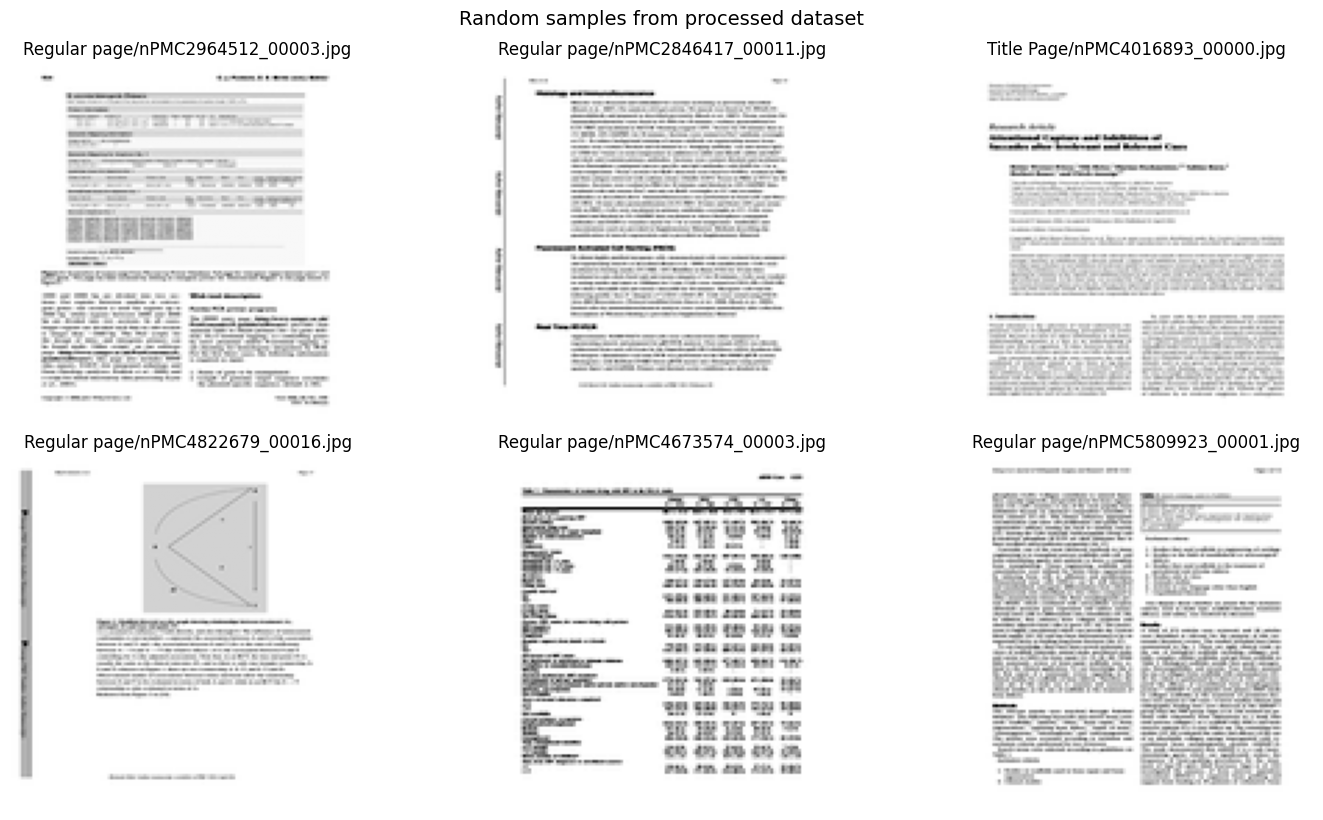

In [12]:
# Visualize
def visualize_from_feature_matrix(X_raw, labels, filenames, target_size=(128, 128), n_samples=6):
    """ Visualize images from feature matrix with labels """
    fig, axes = plt.subplots(2, n_samples//2, figsize=(15, 8))
    axes = axes.flatten()

    indices = np.random.choice(len(X_raw), n_samples, replace=False)

    for i, idx in enumerate(indices):
        image_reconstruction = X_raw[idx].reshape(target_size)

        axes[i].imshow(image_reconstruction, cmap='gray')

        is_title = "Title Page" if labels[idx] == 1 else "Regular page"
        filename = filenames[idx]

        axes[i].set_title(f"{is_title}/n{filename}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle("Random samples from processed dataset", y=1.02, fontsize=14)
    plt.show()

visualize_from_feature_matrix(X_raw, labels, filenames, target_size=(128,128))